<a href="https://colab.research.google.com/github/LucasVale98/Formacao_Machine_Learning/blob/main/Machine_Learning_Lidando_com_dados_de_muitas_dimensoes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **01. Dados com muitas dimensoes**

In [ ]:
import pandas as pd
import numpy as np

**A dimensionalidade dos dados**

In [ ]:
dados =pd.read_csv("https://raw.githubusercontent.com/alura-cursos/reducao-dimensionalidade/master/data-set/exames.csv")
dados.head()

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,exame_14,exame_15,exame_16,exame_17,exame_18,exame_19,exame_20,exame_21,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


In [ ]:
dados.shape

(569, 35)

In [ ]:
dados.describe()

,id,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,exame_14,exame_15,exame_16,exame_17,exame_18,exame_19,exame_20,exame_21,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
count,5.690000e+02,569.000000,569.000000,569.000000,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,5.690000e+02,569.000000,569.000000,569.000000,150.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,1.037800e+02,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,7.860000e-01,0.114606,0.290076,0.083946,0.490452
std,1.250206e+08,3.524049,4.301036,24.298981,7.538380e-13,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,1.333440e-15,0.065732,0.061867,0.018061,0.295748
min,8.670000e+03,6.981000,9.710000,43.790000,1.037800e+02,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,7.860000e-01,0.000000,0.156500,0.055040,0.008199
25%,8.692180e+05,11.700000,16.170000,75.170000,1.037800e+02,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,7.860000e-01,0.064930,0.250400,0.071460,0.209129
50%,9.060240e+05,13.370000,18.840000,86.240000,1.037800e+02,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,7.860000e-01,0.099930,0.282200,0.080040,0.472064
75%,8.813129e+06,15.780000,21.800000,104.100000,1.037800e+02,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,7.860000e-01,0.161400,0.317900,0.092080,0.780266
max,9.113205e+08,28.110000,39.280000,188.500000,1.037800e+02,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,7.860000e-01,0.291000,0.663800,0.207500,0.995380


**Problema na classificação**

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
valores_exames = dados.drop(columns=["id", "diagnostico"])
diagnostico = dados["diagnostico"]

In [ ]:
from numpy import random
SEED = 123143
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames, diagnostico)

In [ ]:
treino_x.head()

,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,exame_14,exame_15,exame_16,exame_17,exame_18,exame_19,exame_20,exame_21,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
114,8.726,15.83,55.84,103.78,230.9,0.11500,0.08201,0.04132,0.01924,0.1649,0.07633,0.1665,0.5864,1.354,8.966,0.008261,0.022130,0.03259,0.010400,0.017080,0.003806,9.628,19.62,64.48,284.4,0.17240,0.23640,0.24560,0.786,0.10500,0.2926,0.10170,NaN
457,13.210,25.25,84.10,103.78,537.9,0.08791,0.05205,0.02772,0.02068,0.1619,0.05584,0.2084,1.3500,1.314,17.580,0.005768,0.008082,0.01510,0.006451,0.013470,0.001828,14.350,34.23,91.29,632.9,0.12890,0.10630,0.13900,0.786,0.06005,0.2444,0.06788,NaN
269,10.710,20.39,69.50,103.78,344.9,0.10820,0.12890,0.08448,0.02867,0.1668,0.06862,0.3198,1.4890,2.230,20.740,0.008902,0.047850,0.07339,0.017450,0.027280,0.007610,11.690,25.21,76.51,410.4,0.13350,0.25500,0.25340,0.786,0.08600,0.2605,0.08701,NaN
520,9.295,13.90,59.96,103.78,257.8,0.13710,0.12250,0.03332,0.02421,0.2197,0.07696,0.3538,1.1300,2.388,19.630,0.015460,0.025400,0.02197,0.015800,0.039970,0.003901,10.570,17.84,67.84,326.6,0.18500,0.20970,0.09996,0.786,0.07262,0.3681,0.08982,0.505731
38,14.990,25.20,95.54,103.78,698.8,0.09387,0.05131,0.02398,0.02899,0.1565,0.05504,1.2140,2.1880,8.077,106.000,0.006883,0.010940,0.01818,0.019170,0.007882,0.001754,14.990,25.20,95.54,698.8,0.09387,0.05131,0.02398,0.786,0.02899,0.1565,0.05504,NaN


In [ ]:
teste_y.head()

550    B
405    B
239    M
76     B
458    B
Name: diagnostico, dtype: object

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
classificador = RandomForestClassifier(n_estimators = 100)
classificador.fit(treino_x, treino_y)
print(classificador.score(teste_x, teste_y))

ValueError: ignored

**Trabalhando com valores faltantes**

In [ ]:
dados.isnull()

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,exame_14,exame_15,exame_16,exame_17,exame_18,exame_19,exame_20,exame_21,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
565,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
566,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
567,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [ ]:
dados.isnull().sum()

id               0
diagnostico      0
exame_1          0
exame_2          0
exame_3          0
exame_4          0
exame_5          0
exame_6          0
exame_7          0
exame_8          0
exame_9          0
exame_10         0
exame_11         0
exame_12         0
exame_13         0
exame_14         0
exame_15         0
exame_16         0
exame_17         0
exame_18         0
exame_19         0
exame_20         0
exame_21         0
exame_22         0
exame_23         0
exame_24         0
exame_25         0
exame_26         0
exame_27         0
exame_28         0
exame_29         0
exame_30         0
exame_31         0
exame_32         0
exame_33       419
dtype: int64

In [ ]:
dados.shape

(569, 35)

In [ ]:
(419 / 569) * 100

73.63796133567662

In [ ]:
dados_v1 = dados.drop(columns="exame_33")

In [ ]:
dados_v1.head()

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,exame_14,exame_15,exame_16,exame_17,exame_18,exame_19,exame_20,exame_21,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678


In [ ]:
valores_exames = dados_v1.drop(columns=["id", "diagnostico"])
diagnostico = dados_v1["diagnostico"]

from numpy import random
SEED = 123143
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames, 
                                                        diagnostico,
                                                        test_size=0.3)

In [ ]:
treino_x.head()

,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,exame_14,exame_15,exame_16,exame_17,exame_18,exame_19,exame_20,exame_21,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32
114,8.726,15.83,55.84,103.78,230.9,0.11500,0.08201,0.04132,0.01924,0.1649,0.07633,0.1665,0.5864,1.354,8.966,0.008261,0.022130,0.03259,0.010400,0.017080,0.003806,9.628,19.62,64.48,284.4,0.17240,0.23640,0.24560,0.786,0.10500,0.2926,0.10170
457,13.210,25.25,84.10,103.78,537.9,0.08791,0.05205,0.02772,0.02068,0.1619,0.05584,0.2084,1.3500,1.314,17.580,0.005768,0.008082,0.01510,0.006451,0.013470,0.001828,14.350,34.23,91.29,632.9,0.12890,0.10630,0.13900,0.786,0.06005,0.2444,0.06788
269,10.710,20.39,69.50,103.78,344.9,0.10820,0.12890,0.08448,0.02867,0.1668,0.06862,0.3198,1.4890,2.230,20.740,0.008902,0.047850,0.07339,0.017450,0.027280,0.007610,11.690,25.21,76.51,410.4,0.13350,0.25500,0.25340,0.786,0.08600,0.2605,0.08701
520,9.295,13.90,59.96,103.78,257.8,0.13710,0.12250,0.03332,0.02421,0.2197,0.07696,0.3538,1.1300,2.388,19.630,0.015460,0.025400,0.02197,0.015800,0.039970,0.003901,10.570,17.84,67.84,326.6,0.18500,0.20970,0.09996,0.786,0.07262,0.3681,0.08982
38,14.990,25.20,95.54,103.78,698.8,0.09387,0.05131,0.02398,0.02899,0.1565,0.05504,1.2140,2.1880,8.077,106.000,0.006883,0.010940,0.01818,0.019170,0.007882,0.001754,14.990,25.20,95.54,698.8,0.09387,0.05131,0.02398,0.786,0.02899,0.1565,0.05504


In [ ]:
teste_y.head()

550    B
405    B
239    M
76     B
458    B
Name: diagnostico, dtype: object

In [ ]:
classificador = RandomForestClassifier(n_estimators = 100)
classificador.fit(treino_x, treino_y)
print(f"Resultado da Classificação: {classificador.score(teste_x, teste_y) * 100} " )

Resultado da Classificação: 92.39766081871345 


**Validando um valor base (baseline)**

https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html

In [ ]:
from sklearn.dummy import DummyClassifier

In [ ]:
SEED = 123143
random.seed(SEED)

classificador_simples = DummyClassifier(strategy = "most_frequent")
classificador_simples.fit(treino_x, treino_y)
print("Resultado da classificação Simples %.2f%%" % (classificador_simples.score(teste_x, teste_y)* 100))

Resultado da classificação Simples 66.67%


# **02. Avançando e explorando dados**

**Construindo uma visualização**

In [ ]:
import seaborn as sns

In [ ]:
dados_v1.head()

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,exame_14,exame_15,exame_16,exame_17,exame_18,exame_19,exame_20,exame_21,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678


In [ ]:
dados_plot = pd.concat([diagnostico, dados_v1], axis = 1)
dados_plot.head()

,diagnostico,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,exame_14,exame_15,exame_16,exame_17,exame_18,exame_19,exame_20,exame_21,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32
0,M,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890
1,M,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902
2,M,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758
3,M,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300
4,M,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678


In [ ]:
dados_plot = pd.melt(dados_plot, id_vars="diagnostico", 
                     var_name="exame", 
                     value_name="valores")

In [ ]:
sns.violinplot(x="exames",y="valores",data=dados_plot)

# **03. Dados Correlacionados**

**Matriz de Correlação**

In [ ]:
dados_v2 = dados_v1.drop(columns=["id"])

In [ ]:
dados_v2.corr().head()

,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,exame_14,exame_15,exame_16,exame_17,exame_18,exame_19,exame_20,exame_21,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32
exame_1,1.000000e+00,3.237819e-01,9.978553e-01,-3.076081e-15,9.873572e-01,1.705812e-01,5.061236e-01,6.767636e-01,8.225285e-01,1.477412e-01,-3.116308e-01,6.790904e-01,-9.731744e-02,6.741716e-01,7.358637e-01,-2.226001e-01,2.060000e-01,1.942036e-01,3.761690e-01,-1.043209e-01,-4.264127e-02,9.695390e-01,2.970076e-01,9.651365e-01,9.410825e-01,1.196161e-01,4.134628e-01,5.269115e-01,3.175431e-15,7.442142e-01,1.639533e-01,7.065886e-03
exame_2,3.237819e-01,1.000000e+00,3.295331e-01,-6.573788e-15,3.210857e-01,-2.338852e-02,2.367022e-01,3.024178e-01,2.934641e-01,7.140098e-02,-7.643718e-02,2.758687e-01,3.863576e-01,2.816731e-01,2.598450e-01,6.613777e-03,1.919746e-01,1.432931e-01,1.638510e-01,9.127168e-03,5.445752e-02,3.525729e-01,9.120446e-01,3.580396e-01,3.435459e-01,7.750336e-02,2.778296e-01,3.010252e-01,6.555804e-15,2.953158e-01,1.050079e-01,1.192054e-01
exame_3,9.978553e-01,3.295331e-01,1.000000e+00,-6.913072e-16,9.865068e-01,2.072782e-01,5.569362e-01,7.161357e-01,8.509770e-01,1.830272e-01,-2.614769e-01,6.917650e-01,-8.676108e-02,6.931349e-01,7.449827e-01,-2.026940e-01,2.507437e-01,2.280823e-01,4.072169e-01,-8.162933e-02,-5.523391e-03,9.694764e-01,3.030384e-01,9.703869e-01,9.415498e-01,1.505494e-01,4.557742e-01,5.638793e-01,7.173684e-16,7.712408e-01,1.891150e-01,5.101853e-02
exame_4,-3.076081e-15,-6.573788e-15,-6.913072e-16,1.000000e+00,-8.985718e-16,6.020621e-15,-1.090357e-15,-3.327900e-16,9.264293e-16,-1.893011e-15,-1.411576e-15,-1.006826e-15,-8.868193e-16,1.815621e-15,-7.678841e-16,-7.131233e-16,-3.884674e-16,8.410404e-16,-2.884337e-16,-3.251730e-16,-3.033961e-16,-2.213189e-15,1.787966e-15,-1.210461e-15,5.297388e-16,-5.153858e-15,-2.114110e-15,5.340981e-16,-1.000000e+00,-2.542717e-16,-2.384562e-15,2.577896e-15
exame_5,9.873572e-01,3.210857e-01,9.865068e-01,-8.985718e-16,1.000000e+00,1.770284e-01,4.985017e-01,6.859828e-01,8.232689e-01,1.512931e-01,-2.831098e-01,7.325622e-01,-6.628021e-02,7.266283e-01,8.000859e-01,-1.667767e-01,2.125826e-01,2.076601e-01,3.723203e-01,-7.249659e-02,-1.988696e-02,9.627461e-01,2.874886e-01,9.591196e-01,9.592133e-01,1.235229e-01,3.904103e-01,5.126059e-01,8.235908e-16,7.220166e-01,1.435699e-01,3.737597e-03


In [ ]:
import matplotlib.pyplot as plt

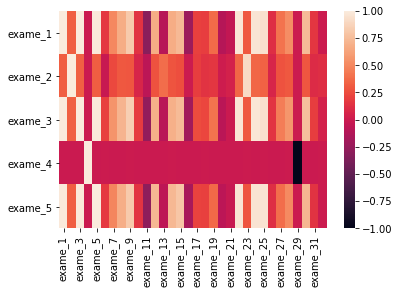

In [ ]:
matriz_correlacao = dados_v1.corr().head()
sns.heatmap(dados_v2.corr().head())

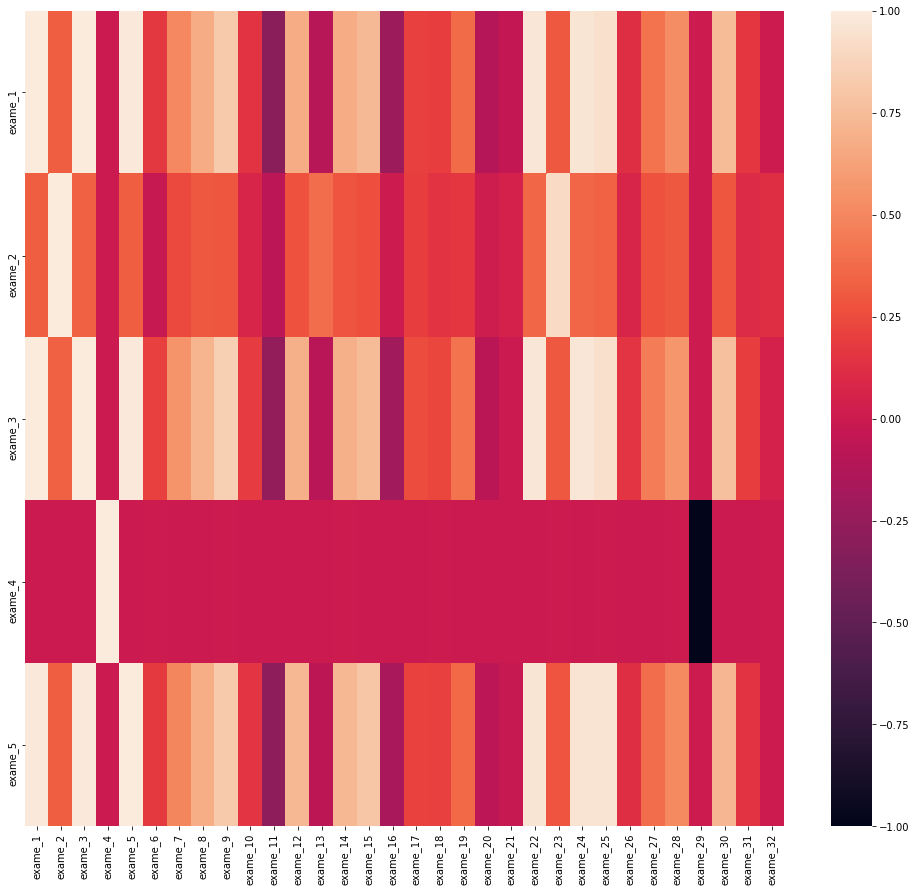

In [ ]:
plt.figure(figsize = (17, 15))
sns.heatmap(dados_v2.corr().head())

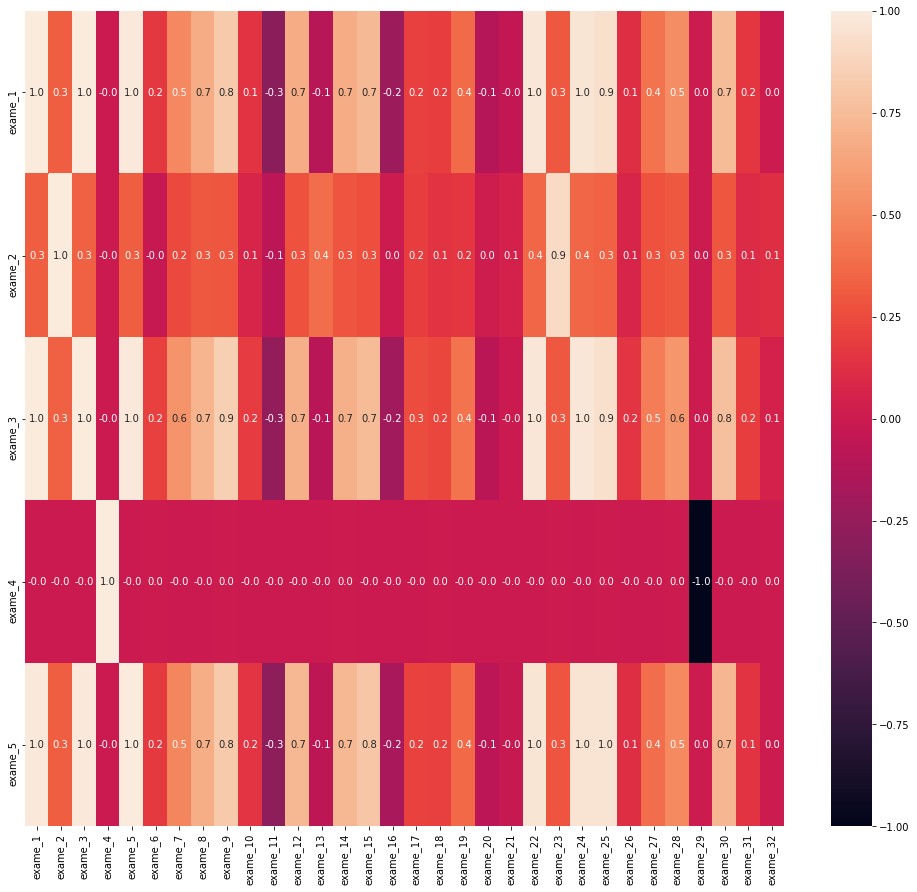

In [ ]:
plt.figure(figsize = (17, 15))
sns.heatmap(dados_v2.corr().head(), annot=True, fmt=".1f")

In [ ]:
matriz_correlacao_v1 = matriz_correlacao[matriz_correlacao>0.9]

In [ ]:
matriz_correlacao_v1

,id,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,exame_14,exame_15,exame_16,exame_17,exame_18,exame_19,exame_20,exame_21,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32
id,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_1,NaN,1.000000,NaN,0.997855,NaN,0.987357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.969539,NaN,0.965137,0.941082,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_2,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.912045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_3,NaN,0.997855,NaN,1.000000,NaN,0.986507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.969476,NaN,0.970387,0.941550,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_4,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
matriz_correlacao_v2 = matriz_correlacao_v1.sum()
matriz_correlacao_v2

id          1.000000
exame_1     1.997855
exame_2     1.000000
exame_3     1.997855
exame_4     1.000000
exame_5     1.973864
exame_6     0.000000
exame_7     0.000000
exame_8     0.000000
exame_9     0.000000
exame_10    0.000000
exame_11    0.000000
exame_12    0.000000
exame_13    0.000000
exame_14    0.000000
exame_15    0.000000
exame_16    0.000000
exame_17    0.000000
exame_18    0.000000
exame_19    0.000000
exame_20    0.000000
exame_21    0.000000
exame_22    1.939015
exame_23    0.912045
exame_24    1.935523
exame_25    1.882632
exame_26    0.000000
exame_27    0.000000
exame_28    0.000000
exame_29    0.000000
exame_30    0.000000
exame_31    0.000000
exame_32    0.000000
dtype: float64